In [20]:

import cv2 
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


In [21]:
gestureNameList = ["forward", "backward", "left", "right", "up", "down", "rotate left", "rotate right", "stop", "land"]

In [22]:
# handDF = pd.read_pickle("OtherDataset.pickle")
handDF = pd.read_pickle("OtherDataset.pickle")

handDF = handDF.dropna(axis='columns')
handDF.isnull().sum().sum()
handDF_cpy = handDF.copy()
handDF

,IdGesture,0x,0y,1x,1y,2x,2y,3x,3y,4x,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
0,8,1.0,1.0,1.226744,0.961240,1.418605,0.886305,1.581395,0.819121,1.738372,...,0.959302,0.428941,0.790698,0.739018,0.703488,0.651163,0.656977,0.591731,0.633721,0.532300
1,8,1.0,1.0,1.224852,0.963636,1.426036,0.890909,1.591716,0.828571,1.745562,...,0.952663,0.433766,0.786982,0.740260,0.698225,0.654545,0.656805,0.594805,0.627219,0.535065
2,8,1.0,1.0,1.220238,0.963542,1.416667,0.890625,1.577381,0.825521,1.732143,...,0.940476,0.434896,0.773810,0.744792,0.684524,0.656250,0.636905,0.596354,0.613095,0.536458
3,8,1.0,1.0,1.222892,0.966146,1.427711,0.893229,1.596386,0.828125,1.759036,...,0.951807,0.432292,0.789157,0.742188,0.698795,0.656250,0.644578,0.596354,0.620482,0.536458
4,8,1.0,1.0,1.225610,0.966234,1.426829,0.890909,1.597561,0.823377,1.756098,...,0.945122,0.436364,0.780488,0.742857,0.689024,0.654545,0.640244,0.597403,0.609756,0.537662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803,9,1.0,1.0,1.291667,1.125000,1.562500,1.354167,1.791667,1.493056,2.000000,...,1.048611,1.722222,0.805556,1.541667,0.819444,1.881944,0.861111,1.805556,0.881944,1.680556
10804,9,1.0,1.0,1.273333,1.116438,1.533333,1.342466,1.746667,1.472603,1.940000,...,1.033333,1.684932,0.813333,1.527397,0.820000,1.856164,0.860000,1.773973,0.873333,1.643836
10805,9,1.0,1.0,1.267974,1.108844,1.522876,1.326531,1.738562,1.455782,1.928105,...,1.032680,1.680272,0.816993,1.510204,0.830065,1.836735,0.862745,1.761905,0.882353,1.632653
10806,9,1.0,1.0,1.245283,1.124138,1.484277,1.344828,1.685535,1.482759,1.867925,...,1.012579,1.696552,0.792453,1.517241,0.798742,1.848276,0.836478,1.772414,0.861635,1.648276


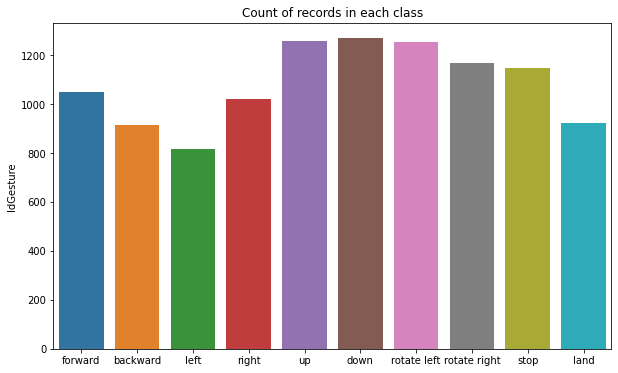

In [25]:
import seaborn as sns

numberOfGests = handDF.IdGesture.value_counts().sort_index()
numberDataFrame = pd.DataFrame()
numberDataFrame["GestsNumbers"] = numberOfGests
numberDataFrame["GestLabel"] = gestureNameList


plt.figure(figsize=(10, 6))
sns.barplot(y=numberOfGests, x=gestureNameList)
plt.title("Count of records in each class")
plt.show()


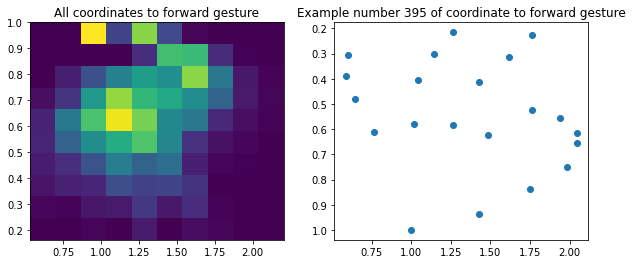

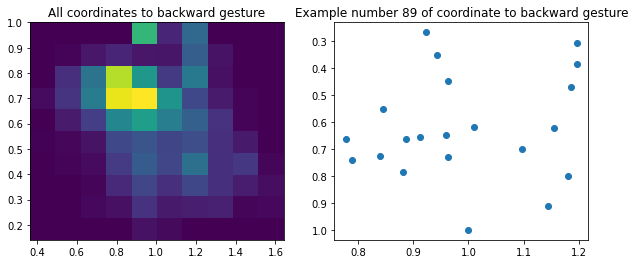

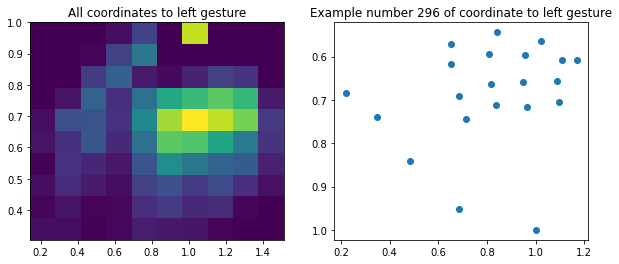

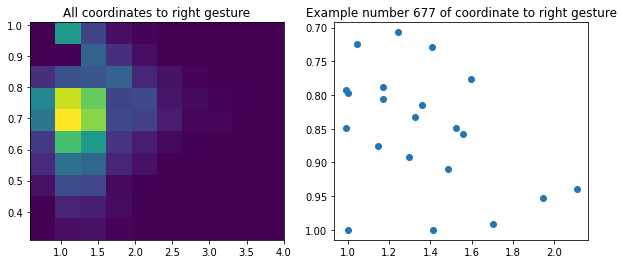

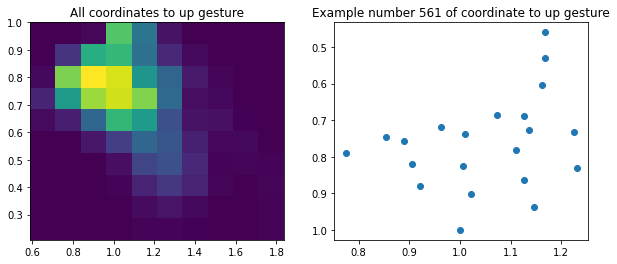

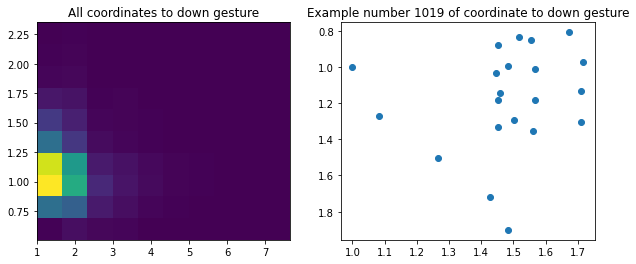

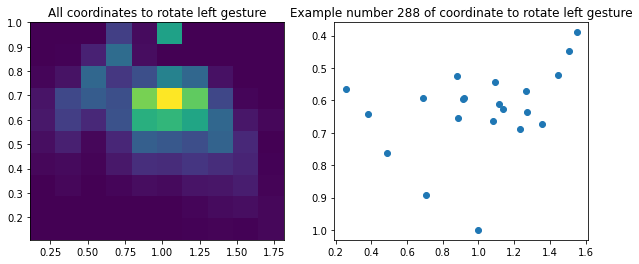

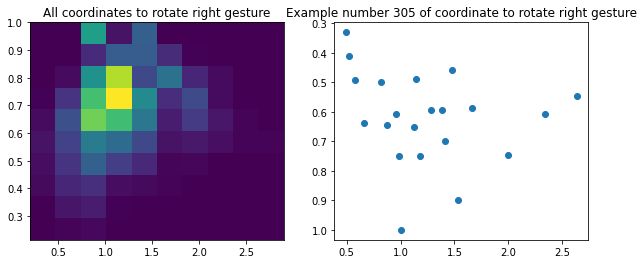

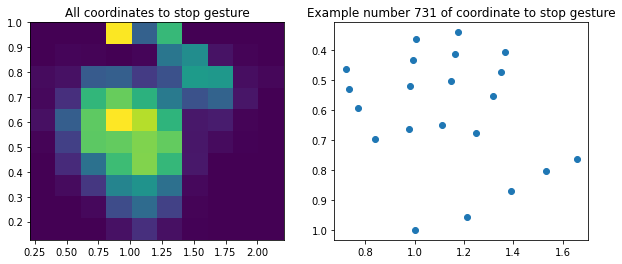

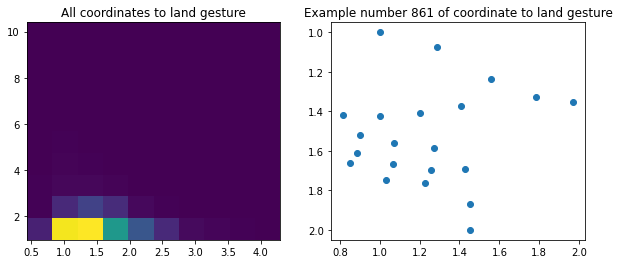

In [24]:
for i in range(0,10):
    gestureData = handDF_cpy.loc[handDF_cpy['IdGesture'] == str(i)]
    x_values = []
    y_values = []
    for vals in gestureData.values:
        x_values.append(vals[1::2] / vals[1])
        y_values.append(vals[2::2] / vals[2])

    randStartingPoint = random.randrange(0,len(gestureData))

    oneValX = x_values[randStartingPoint]
    oneValY = y_values[randStartingPoint]

    x_values = np.concatenate(x_values,axis=0)
    y_values = np.concatenate(y_values,axis=0)

    fig = plt.figure(figsize=(10,4))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.invert_yaxis()
    ax1.hist2d(x_values,y_values)
    ax1.set_title("All coordinates to " + gestureNameList[i] + " gesture")


    ax2.invert_yaxis()
    ax2.scatter(oneValX,oneValY)
    ax2.set_title(f"Example number {randStartingPoint} of coordinate to {gestureNameList[i]} gesture")
